# Data visualisation project
> **Uzma, Youssra, Félita**<br>
> **M1 MéDAS 2020-2021**

### Problématique

 Ayant un intérêt particulier pour la santé et les inégalités, nous voulons analyser comment ces deux enjeux sont liés. <br> Certaines études ont déjà été faites à ce sujet mais à une échelle beaucoup plus globale, notamment *The Spirit Level: Why Equality is Better for Everyone* de Richard G. Wilkinson et Kate Pickett. Nous aurons un objectif commun avec ce livre, démontrer les effets des inégalités sociales sur la santé, mais en nous concentrant sur la France et en explorant des maladies précises.

### Jeu de données

Nous avons trouvé les données sur le site de l'INSEE, en choisissant un niveau de granularité départemental.<br>
Nous avons choisi des indicateurs qui représentent au mieux le thème de l'inégalité tout en permettant une comparaison standardisée entre les départements :
- le taux de pauvreté est plus représentatif des disparités sociales comparé à une moyenne des revenus
- les taux de maladie standardisés homogénisent les différences démographiques

### Questionnement et Méthode

Nous partons d'une approche "d'enquête" : nous ne savons a priori pas si toutes les maladies sont liées au niveau de vie, si il y en a plus que d'autres, lesquelles seraient-elles et pourquoi. La structure du code est donc chronologiquement basée sur nos explorations et nos découvertes.<br>
- Phase 1 Exploration : sélection de plusieurs maladies répandues et de nature différente
- Phase 2  
- Phase 3 Approfondissement : recherche sur les maladies corrélées au niveau de vie

## Code

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from functools import reduce
import seaborn as sns
import geopandas as gpd

In [2]:
items = os.listdir('Data/geodes')

# filenames = []
files_list = []

for file in items:
    if file.endswith('.csv'):
        files_list.append(file)
        
#         filename = file.split('.')[0]
#         filenames.append(filename)

In [3]:
maladies = []
for file in files_list:
    df = pd.read_csv(f"Data/geodes/{file}", sep=';', header=2)
    maladies.append(df)  

In [4]:
pauvrete = pd.read_csv('Data/pauvrete.csv', sep=';')
pauvrete = pauvrete.loc[:, ['CODGEO', 'MED17', 'TP6017']]
pauvrete.columns = ['Code', 'Médiane du niveau de vie', 'Taux de pauvreté']

## Phase 1 : Trouver les coefficients de corrélation entre le niveau de vie et plusieurs maladies

In [5]:
merged = reduce(lambda left, right: pd.merge(left, right), maladies)

In [6]:
social_data = pauvrete.merge(merged, left_on='Code', right_on='Code')

In [7]:
social_data

,Code,Médiane du niveau de vie,Taux de pauvreté,Libellé,Taux d'hospitalisation pour pathologies ORL 2020-S43,Taux standardisé de tentatives de suicide 2017,Taux d'hospitalisation pour asthme 2020-S44,Taux d'hospitalisation pour gastro-entérite aiguë 2020-S44,Taux de notification - méningocoque B 2019,Taux standardisé de patients hospitalisés pour AVC 2016,Taux de prévalence standardisé de la maladie de Parkinson 2015,Taux de prévalence standardisé de diabète traité pharmacologiquement 2016,Taux de sérologies positives pour VIH 2018
0,01,22640,10.5,Ain,0.0,110.5,5000.0,0.0,0.00,154.1,2.56,4.39,0.6
1,02,19100,18.5,Aisne,119.0,224.1,1538.0,1000.0,0.38,171.6,2.35,6.27,0.7
2,03,19750,15.4,Allier,0.0,161.8,0.0,2222.2,0.00,163.9,2.40,5.19,1.6
3,04,19940,16.6,Alpes-de-Haute-Provence,357.0,145.5,1000.0,1250.0,0.61,148.1,2.29,4.32,NaN
4,05,20350,13.9,Hautes-Alpes,0.0,144.5,4000.0,1428.6,1.41,143.9,2.59,3.91,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,17310,27.9,Seine-Saint-Denis,290.0,58.6,2364.0,1428.6,0.12,193.9,2.16,7.76,2.9
94,94,22290,16.3,Val-de-Marne,338.0,77.6,2157.0,1219.5,0.21,166.3,2.24,5.47,2.9
95,95,21470,16.6,Val-d'Oise,101.0,85.4,2581.0,1000.0,0.08,174.2,2.62,6.43,1.8
96,972,17580,28.6,Martinique,NaN,84.6,NaN,NaN,0.28,199.0,1.64,7.67,2.8


In [8]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

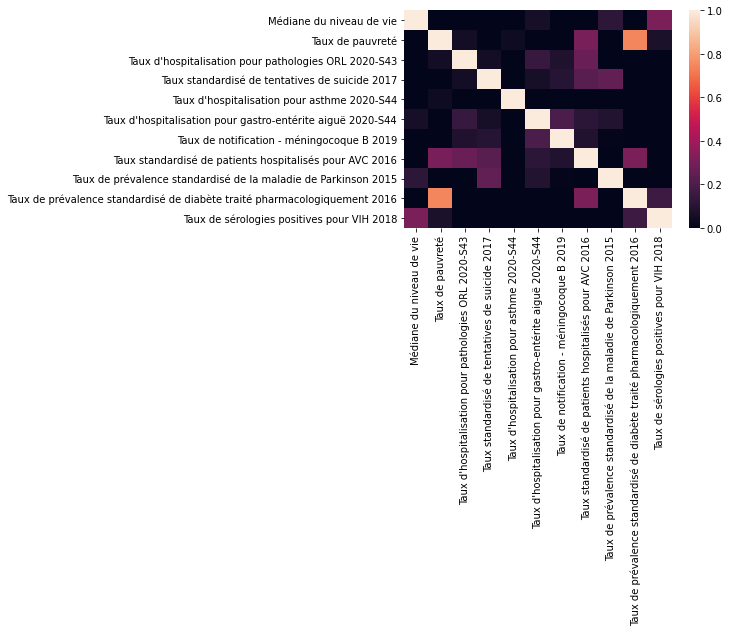

In [9]:
sns.heatmap(social_data.corr(), vmin=0)

> #### Bilan Phase d'Exploration
> Le constat est que le niveau de vie semble être surtout corrélé avec le diabète.

## Phase 2 : Lien entre niveau de vie et diabète de type 2

### Le diabète par département

In [10]:
fp = 'Geo/departements-20140306-5m.shp'

In [11]:
map_df = gpd.read_file(fp)

In [12]:
map_df

,code_insee,nom,nuts3,wikipedia,geometry
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ..."
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ..."
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ..."
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ..."
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ..."
...,...,...,...,...,...
96,971,Guadeloupe,FR910,fr:Guadeloupe,"MULTIPOLYGON (((-61.61403 15.83955, -61.61399 ..."
97,972,Martinique,FR920,fr:Martinique,"MULTIPOLYGON (((-60.86880 14.39091, -60.86875 ..."
98,973,Guyane,FR930,fr:Guyane,"MULTIPOLYGON (((-52.58463 5.28309, -52.58348 5..."
99,974,b'La R\xe9union',FR940,b'fr:La R\xe9union',"MULTIPOLYGON (((55.77886 -21.36291, 55.77889 -..."


In [20]:
metropole = map_df[:96]

In [15]:
social_data_diabete = social_data[['Code', 'Taux de prévalence standardisé de diabète traité pharmacologiquement 2016']]
social_data_diabete = social_data_diabete.rename(columns={'Taux de prévalence standardisé de diabète traité pharmacologiquement 2016':'Diabète type II'})

In [42]:
diabete_geo = metropole.merge(social_data_diabete, left_on='code_insee', right_on='Code')

In [25]:
variable = 'Diabète type II'
vmin, vmax = 120, 220

Text(0.25, 0.08, 'Source: INSEE, 2016')

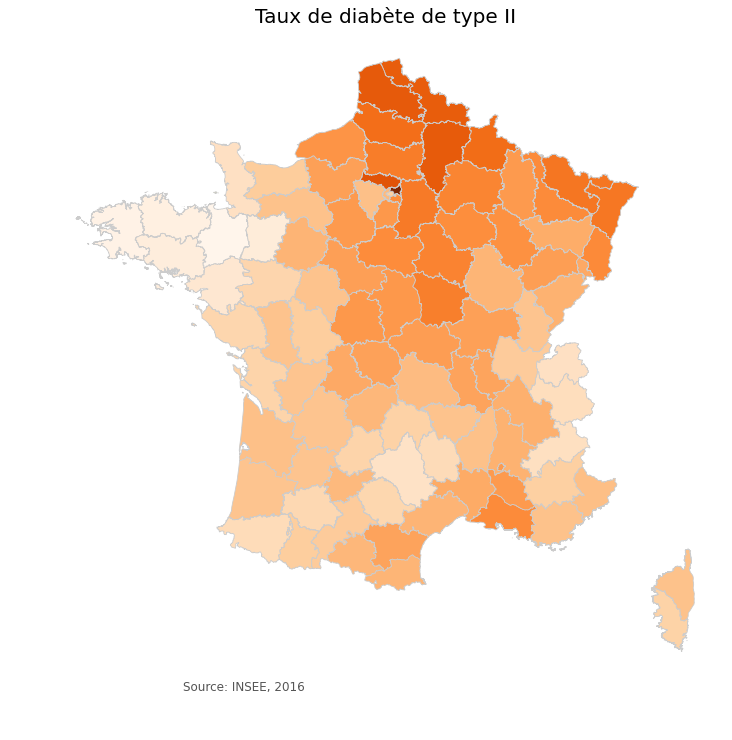

In [43]:
fig, ax = plt.subplots(1, figsize=(20, 12))
diabete_geo.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')
ax.set_title('Taux de diabète de type II', fontsize=20)
ax.annotate('Source: INSEE, 2016', xy=(0.25, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

In [40]:
social_data_pauvrete = social_data[['Code', 'Taux de pauvreté']]

In [44]:
pauvrete_geo = metropole.merge(social_data_pauvrete, left_on='code_insee', right_on='Code')

In [45]:
pauvrete_geo

,code_insee,nom,nuts3,wikipedia,geometry,Code,Taux de pauvreté
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",01,10.5
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",02,18.5
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",03,15.4
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",04,16.6
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",05,13.9
...,...,...,...,...,...,...,...
91,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",91,12.7
92,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",92,11.8
93,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",93,27.9
94,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",94,16.3


In [46]:
variable2 = 'Taux de pauvreté'
vmin, vmax = 120, 220

Text(0.25, 0.08, 'Source: INSEE, 2016')

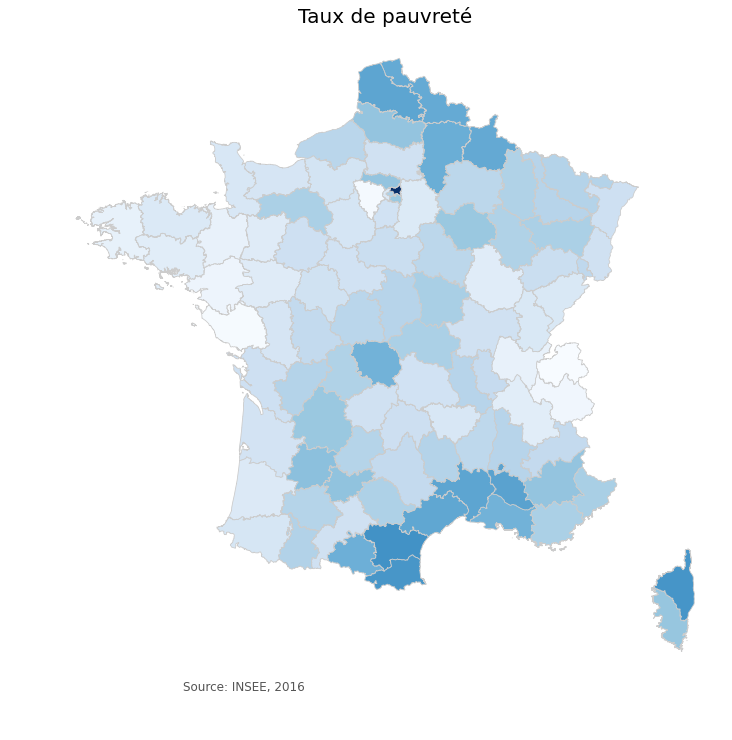

In [48]:
fig, ax = plt.subplots(1, figsize=(20, 12))
pauvrete_geo.plot(column=variable2, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')
ax.set_title('Taux de pauvreté', fontsize=20)
ax.annotate('Source: INSEE, 2016', xy=(0.25, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')